In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [20]:
# y_train = y_train.reshape(-1,)
y_train=y_train.flatten()
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [21]:
y_test = y_test.reshape(-1,)

In [22]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [23]:
# classesindex=set(y_test)
# classesindex

In [24]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

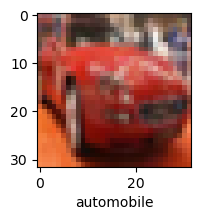

In [25]:
plot_sample(X_train, y_train, 5)

In [26]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [27]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2),2),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2),2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

C:\Users\Atharva\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [30]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [39]:
history=cnn.fit(X_train, y_train, epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8135 - loss: 0.5323 - val_accuracy: 0.6774 - val_loss: 1.0517
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8203 - loss: 0.5089 - val_accuracy: 0.7055 - val_loss: 0.9021
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8307 - loss: 0.4758 - val_accuracy: 0.7031 - val_loss: 0.9376
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8395 - loss: 0.4456 - val_accuracy: 0.7070 - val_loss: 0.9660
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8483 - loss: 0.4237 - val_accuracy: 0.7184 - val_loss: 0.9103


In [40]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7191 - loss: 0.8941


[0.9103153347969055, 0.7184000015258789]

In [42]:
# history=cnn.history.history
print(history.history)

{'accuracy': [0.8044000267982483, 0.8147600293159485, 0.8259000182151794, 0.8318600058555603, 0.8405200242996216], 'loss': [0.559079110622406, 0.5236012935638428, 0.49270033836364746, 0.4681244492530823, 0.4450681209564209], 'val_accuracy': [0.6773999929428101, 0.7055000066757202, 0.7031000256538391, 0.7070000171661377, 0.7184000015258789], 'val_loss': [1.0517332553863525, 0.9020575881004333, 0.9375997185707092, 0.9659602642059326, 0.9103153347969055]}


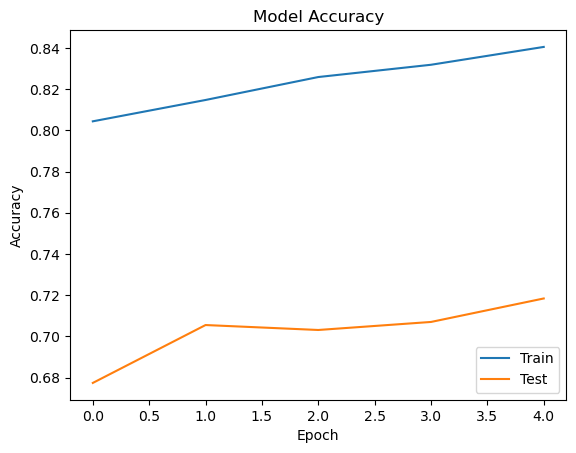

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')

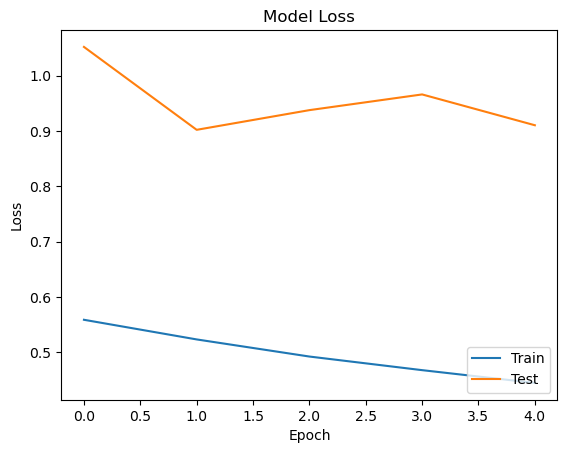

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='lower right')

In [30]:
y_pred = cnn.predict(X_test)
y_pred[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.21429982e-05, 2.47057887e-05, 1.20985857e-03, 8.30344021e-01,
        2.66149673e-05, 1.58643976e-01, 6.75921654e-03, 1.75491348e-03,
        9.95514682e-04, 2.19003618e-04],
       [2.84213129e-05, 3.19379906e-04, 1.10920417e-09, 3.63533181e-09,
        7.89338664e-11, 3.12432524e-10, 3.16313482e-08, 1.11655119e-12,
        9.99651194e-01, 1.00754710e-06],
       [2.33474709e-02, 6.63408279e-01, 5.61078305e-05, 3.59373773e-03,
        1.20611345e-04, 1.06611427e-04, 1.66516038e-04, 8.02456125e-05,
        1.64850026e-01, 1.44270420e-01],
       [9.96886551e-01, 5.86293099e-05, 8.66159462e-05, 2.12360806e-06,
        1.73245771e-05, 3.98418308e-07, 5.55687848e-06, 6.16425386e-05,
        2.88035348e-03, 7.22486902e-07],
       [8.17497003e-09, 1.97495276e-04, 1.80564052e-03, 6.63976185e-03,
        1.00996643e-02, 7.81803916e-04, 9.80439246e-01, 2.72783518e-06,
        1.76279207e-06, 3.18087732e-05],
       [5.83309713e-07, 1.10547435e-05, 3.79308563e-04, 2.27900269e-03,
   

In [31]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 1, 0, 6, 6, 1, 2, 3, 1]

In [32]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
cm=confusion_matrix(y_classes,y_test)

In [35]:
cm

array([[748,  26,  52,  31,  19,  19,  14,  20,  47,  38],
       [ 11, 796,   7,  12,   2,   8,   3,   6,  31,  54],
       [ 68,   5, 644, 101,  83, 100,  58,  53,  13,  10],
       [  8,   5,  30, 438,  39, 127,  48,  27,   8,   9],
       [ 17,   4,  85,  84, 675,  47,  33,  51,   5,   6],
       [ 10,   2,  45, 171,  34, 575,  18,  45,   3,   2],
       [ 10,   7,  67,  69,  41,  26, 791,  10,   9,   4],
       [ 10,   3,  39,  42,  90,  62,  12, 765,   6,  12],
       [ 81,  33,  15,  23,  14,  12,  11,   3, 844,  37],
       [ 37, 119,  16,  29,   3,  24,  12,  20,  34, 828]], dtype=int64)

In [36]:
import seaborn as sns

<Axes: >

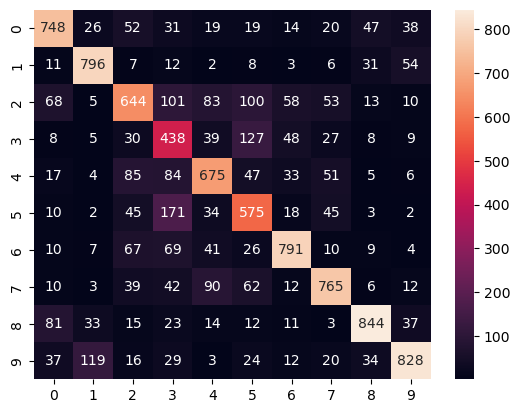

In [37]:
sns.heatmap(cm,annot=True,fmt='d')

In [38]:
print(classification_report(y_classes,y_test))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1014
           1       0.80      0.86      0.82       930
           2       0.64      0.57      0.60      1135
           3       0.44      0.59      0.50       739
           4       0.68      0.67      0.67      1007
           5       0.57      0.64      0.60       905
           6       0.79      0.76      0.78      1034
           7       0.77      0.73      0.75      1041
           8       0.84      0.79      0.81      1073
           9       0.83      0.74      0.78      1122

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



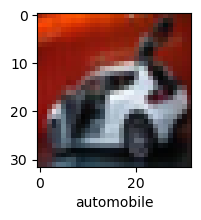

In [41]:
plot_sample(X_test, y_test,6)

In [42]:
classes[y_classes[6]]

'automobile'

## user input

In [57]:
def user_input_test(image_path):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(32, 32))
    image = tf.keras.preprocessing.image.img_to_array(image)
    
    image = image / 255.0
    predictions = cnn.predict(np.expand_dims(image, axis=0))
    predicted_class = np.argmax(predictions)
    plt.imshow(image)
    print("Predicted class:", classes[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class: airplane


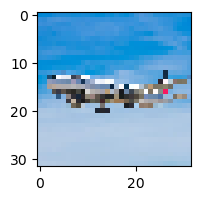

In [59]:
# import os

# image_path = input("Enter the path to the image: ")
# if os.path.exists(image_path):
#     user_input_test(image_path)
# else:
#     print("Error:file not found")

    
img_path=r"C:\Users\Atharva\Downloads\airplane.jpg"
plt.figure(figsize=(15,2))
user_input_test(img_path)


In [40]:
import numpy as np

# Example confusion matrix (10x10)
conf_matrix = np.array([[100, 5, 2, 0, 1, 0, 0, 0, 2, 0],
                        [3, 90, 0, 0, 1, 0, 0, 5, 1, 0],
                        [1, 0, 80, 0, 0, 1, 0, 0, 3, 2],
                        [0, 0, 0, 70, 0, 0, 0, 0, 1, 3],
                        [0, 2, 1, 0, 90, 0, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 95, 0, 0, 0, 0],
                        [0, 0, 0, 0, 0, 0, 85, 0, 1, 0],
                        [0, 1, 0, 0, 1, 0, 0, 85, 0, 2],
                        [2, 3, 4, 1, 0, 0, 0, 0, 95, 0],
                        [0, 0, 2, 3, 0, 0, 0, 0, 0, 90]])

# Calculate precision for each class
precision = np.zeros(10)
for c in range(10):
    TP = cm[c, c]
    FP = np.sum(cm[:, c]) - TP
    precision[c] = TP / (TP + FP)

print("Precision for each class:", precision)


Precision for each class: [0.748 0.796 0.644 0.438 0.675 0.575 0.791 0.765 0.844 0.828]
